In [42]:
import numpy as np
from tensorflow.keras import datasets,utils
import tensorflow as tf

In [43]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

In [44]:

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

number_of_classes = 10
y_train = utils.to_categorical(y_train,number_of_classes)
y_test = utils.to_categorical(y_test,number_of_classes)

In [45]:
print(f"x_train:{x_train.shape} y_train{y_train.shape}")
print(f"x_test:{x_test.shape} y_test{y_test.shape}")

x_train:(50000, 32, 32, 3) y_train(50000, 10)
x_test:(10000, 32, 32, 3) y_test(10000, 10)


In [46]:
from tensorflow.keras import models,layers

In [47]:

class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.flatten_layer = layers.Flatten()
        self.dense1 = layers.Dense(units=200, activation="relu")
        self.dense2 = layers.Dense(units=150, activation="relu")
        self.output_layer = layers.Dense(units=10, activation="softmax")
        
    def call(self, inputs, training=None, mask=None):
        x = self.flatten_layer(inputs)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.output_layer(x)
        return x
        

In [48]:
model = MyModel()
model.build((None,32,32,3))
model.summary()

Model: "my_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         multiple                  0         
                                                                 
 dense_12 (Dense)            multiple                  614600    
                                                                 
 dense_13 (Dense)            multiple                  30150     
                                                                 
 dense_14 (Dense)            multiple                  1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
from tensorflow.keras import optimizers

In [50]:
opt = optimizers.legacy.Adam(learning_rate=0.0005)

In [51]:
model.compile(loss="categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

In [52]:
model.fit(x_train,y_train,batch_size=64,epochs=10,shuffle=True)

Epoch 1/10
782/782 [==============================] - 2s 2ms/step - loss: 1.8554 - accuracy: 0.3332
Epoch 2/10
782/782 [==============================] - 1s 2ms/step - loss: 1.6749 - accuracy: 0.4009
Epoch 3/10
782/782 [==============================] - 1s 2ms/step - loss: 1.5937 - accuracy: 0.4324
Epoch 4/10
782/782 [==============================] - 1s 2ms/step - loss: 1.5345 - accuracy: 0.4528
Epoch 5/10
782/782 [==============================] - 1s 2ms/step - loss: 1.5020 - accuracy: 0.4653
Epoch 6/10
782/782 [==============================] - 1s 2ms/step - loss: 1.4647 - accuracy: 0.4794
Epoch 7/10
782/782 [==============================] - 1s 2ms/step - loss: 1.4410 - accuracy: 0.4874
Epoch 8/10
782/782 [==============================] - 1s 2ms/step - loss: 1.4176 - accuracy: 0.4978
Epoch 9/10
782/782 [==============================] - 1s 2ms/step - loss: 1.3914 - accuracy: 0.5059
Epoch 10/10
782/782 [==============================] - 1s 2ms/step - loss: 1.3716 - accuracy: 0.5122

In [53]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 560us/step - loss: 1.4329 - accuracy: 0.4927


[1.4328856468200684, 0.4927000105381012]

In [54]:
classes = np.array(["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"])

out = model.predict(x_test)
pred = classes[np.argmax(out,axis=-1)]
ans = classes[np.argmax(y_test,axis=-1)]

313/313 [==============================] - 0s 512us/step


In [55]:
import matplotlib.pyplot as plt

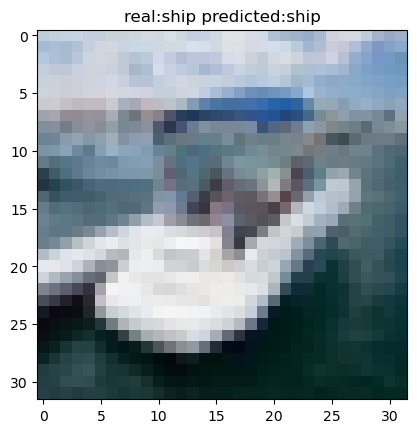

In [56]:
idx = np.random.choice(len(x_test))
plt.title(f"real:{ans[idx]} predicted:{pred[idx]}")
plt.imshow(x_test[idx])